데이터 : https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70 에서 서울(108)의 2011.01.01~ 2016.12.31 까지의 데이터

In [2]:
#파이토치

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#판다스
import pandas as pd

#넘파이
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [5]:
data = pd.read_csv("./data/ta_20190123214932.csv",skiprows=[0,1,2,3,4,5],encoding="cp949")

In [6]:
data.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2011-01-01,108,-6.8,-10.4,-2.9
1,2011-01-02,108,-5.4,-8.5,-1.2
2,2011-01-03,108,-4.5,-8.5,-0.3
3,2011-01-04,108,-3.9,-7.4,-1.7
4,2011-01-05,108,-4.0,-7.7,-1.8


## data explore

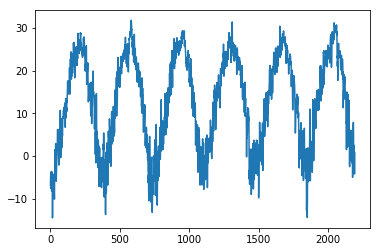

In [8]:
#평균 기온값 추출 및 시각화
temp = data['평균기온(℃)']

temp.plot()

## 데이터 분할 : train & test

In [10]:
# 2011.01.01 ~ 2014.12.31
train_x = temp[:1461]

# 2015.01.01 ~ 2016.12.31
test_x = temp[1461:]

# Numpy 배열로 변환
train_x = np.array(train_x)
test_x = np.array(test_x)

In [12]:
#설명변수 수 : 6개월
ATTR_SIZE = 180

tmp = []
train_X = []

#데이터 점 1개 단위로 윈도우를 슬라이드 시키며 훈련 데이터를 추출
for i in range(0, len(train_x)-ATTR_SIZE):
    tmp.append(train_x[i:i+ATTR_SIZE])
train_X= np.array(tmp)

# 훈련 데이터를 데이터프레임으로 변환해서 출력
pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-6.8,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,...,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0
1,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,...,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8
2,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,...,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1
3,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,...,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7
4,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,...,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6
5,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,...,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5
6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,...,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3
7,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,...,19.2,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6
8,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,...,24.1,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6,22.9
9,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,-6.6,...,21.0,23.8,25.1,24.7,22.6,22.5,24.3,25.6,22.9,22.4


## 신경망 구성

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(180,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,128)
        self.fc4 = nn.Linear(128,180)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [14]:
model = Net()

In [18]:
#오차함수
criterion = nn.MSELoss()

In [19]:
# 최적화기법
optimizer = optim.Adam(model.parameters(),lr=0.001)

## 학습

In [27]:
for epoch in range(1000):
    total_loss = 0
    d= []
    
    # 훈련 데이터를 미니 배치로 분할
    for i in range(100):
        #훈련 데이터에 인덱스 부여
        index = np.random.randint(0,1281)
        # 미니 배치 분할
        d.append(train_X[index])
    # 넘파이 배열로 변환
    d = np.array(d, dtype='float32')
    #계산 그래프 구성
    d = Variable(torch.from_numpy(d)) # torch.from_numpy 가 텐서로 변환
    
    #경사 초기화
    optimizer.zero_grad()
    #순전파 계산
    output = model(d)
    # 오차 계산
    loss = criterion(output, d)
    #역전파
    loss.backward()
    #가중치 업데이트
    optimizer.step()
    #오차 누적 계산
    total_loss += loss.item()
    
    #100번마다 출력
    if (epoch+1) % 100 ==0:
        print(epoch+1, total_loss)

100 3.0719475746154785
200 3.1333065032958984
300 3.0025956630706787
400 2.9499495029449463
500 2.708717107772827
600 2.7271010875701904
700 2.5681777000427246
800 2.5103509426116943
900 2.541454553604126
1000 2.405766010284424


## 입력 데이터 플로팅

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upeer right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


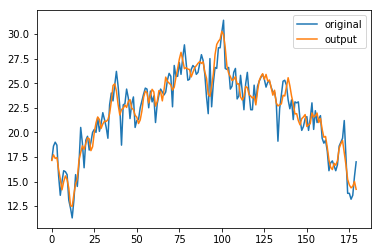

In [28]:
plt.plot(d.data[0].numpy(), label = 'original')
plt.plot(output.data[0].numpy(), label = 'output')
plt.legend(loc='upeer right')
plt.show()

## 이상 점수 계산

In [29]:
tmp = []
test_X = []

# 테스트 데이터를 6개월 단위로 분할
tmp.append(test_x[0:180])
tmp.append(test_x[180:360])
tmp.append(test_x[360:540])
tmp.append(test_x[540:720])
test_X = np.array(tmp, dtype="float32")

# 데이터를 데이터 프레임으로 변환해서 화면에 출력
pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-7.7,-6.000000,-2.700000,2.500000,3.700000,-3.200000,-5.500000,-5.1,-2.1,-0.3,...,19.600000,22.4,24.0,24.700001,25.700001,24.799999,21.000000,25.200001,25.400000,25.700001
1,24.4,23.700001,23.700001,23.299999,24.100000,24.200001,25.299999,25.6,23.4,26.5,...,-4.600000,-3.3,-0.1,1.500000,2.200000,3.100000,5.900000,1.500000,-0.800000,0.900000
2,-5.7,-5.700000,-3.200000,0.300000,0.700000,1.200000,5.700000,6.5,2.0,-2.7,...,23.799999,20.9,20.9,23.799999,24.500000,24.100000,24.700001,26.000000,24.299999,24.700001
3,23.1,22.799999,24.400000,24.400000,24.700001,25.299999,24.600000,24.0,23.5,23.5,...,-1.100000,2.3,3.4,-1.400000,-5.000000,-4.700000,2.700000,4.900000,7.200000,7.600000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upeer right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


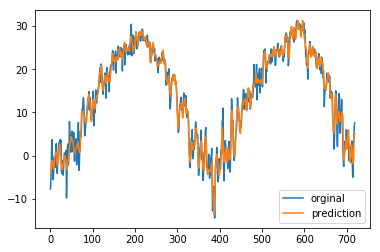

In [32]:
#모형 적용
d = Variable(torch.from_numpy(test_X))
output = model(d)

plt.plot(test_X.flatten(), label='orginal')
plt.plot(output.data.numpy().flatten(), label='prediction')
plt.legend(loc='upeer right')
plt.show()

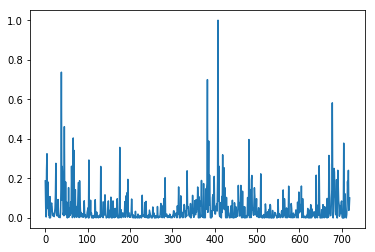

In [36]:
#이상 점수 계산
test = test_X.flatten()
pred = output.data.numpy().flatten()

total_score = []
for i in range(0,720):
    dist = (test[i] - pred[i])
    score = pow(dist,2)
    total_score.append(score)

# 이상 점수를 [0,1] 구간으로 정규화
total_score = np. array(total_score)
max_score = np.max(total_score)
total_score = total_score / max_score

# 이상 점수 플로팅
plt.plot(total_score)
plt.show()